In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read zomato.csv dataset

In [2]:
zomato=pd.read_csv('zomato.csv',encoding='latin-1')

In [3]:
zomato.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71


In [4]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         8652 non-null   int64  
 1   Restaurant Name       8652 non-null   object 
 2   Country Code          8652 non-null   int64  
 3   City                  8652 non-null   object 
 4   Address               8652 non-null   object 
 5   Locality              8652 non-null   object 
 6   Locality Verbose      8652 non-null   object 
 7   Longitude             8652 non-null   float64
 8   Latitude              8652 non-null   float64
 9   Cuisines              8652 non-null   object 
 10  Average Cost for two  8652 non-null   int64  
 11  Currency              8652 non-null   object 
 12  Has Table booking     8652 non-null   object 
 13  Has Online delivery   8652 non-null   object 
 14  Is delivering now     8652 non-null   object 
 15  Switch to order menu 

## Find the Missing values in each column

In [5]:
zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

##  City which has maximum number of restaurants

In [6]:
max_rest_city=zomato.groupby(by='City',sort=False).count()['Restaurant Name']
max_rest_city.sort_values().tail(1)

City
New Delhi    5473
Name: Restaurant Name, dtype: int64

## Best locality where maximum Restaurants are listed

In [7]:
max_rest_loc=zomato.groupby(by='Locality',sort=False).count()['Restaurant Name']
max_rest_loc.sort_values().tail(1)

Locality
Connaught Place    122
Name: Restaurant Name, dtype: int64

## Five most frequent Cuisine offered by highly rated restaurant.

In [8]:
zomato_Cuisines=zomato[['Restaurant Name','Aggregate rating','Cuisines']].sort_values(by='Aggregate rating',ascending=False).head(100)
zomato_Cuisines_count=zomato_Cuisines.Cuisines.value_counts()
zomato_Cuisines_count.head(5)

North Indian                             7
European, Mediterranean, North Indian    3
North Indian, Chinese                    3
Modern Indian                            3
North Indian, Mughlai                    3
Name: Cuisines, dtype: int64

## Comparing the online delivery status and getting the 3 localities from where online delivery is maximum.

In [9]:
zomato[['Has Online delivery']].value_counts()

Has Online delivery
No                     6229
Yes                    2423
dtype: int64

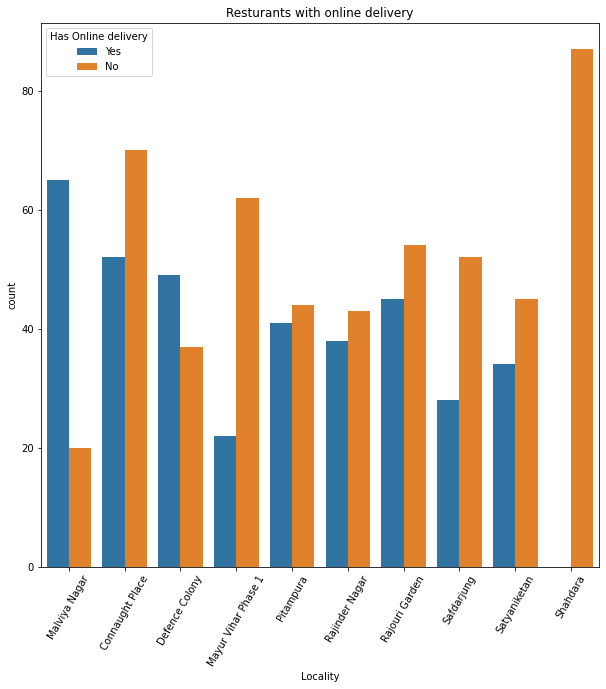

In [10]:
top_loc = zomato.Locality.value_counts().head(10)
plt.figure(figsize=(10,10))
axis = sns.countplot(x= "Locality", hue="Has Online delivery", data=zomato[zomato.Locality.isin(top_loc.index)])
axis.tick_params(axis='x',rotation=60)
plt.title('Resturants with online delivery');

In [11]:
for i in zomato['Has Online delivery']:
    if(i=='Yes'):
        df5=zomato.loc[zomato['Has Online delivery']==i]
print(df5[['Locality']].value_counts().head(3))

Locality       
Malviya Nagar      65
Connaught Place    52
Sector 18          51
dtype: int64


##  Infering the relation between Rating and cost of dining

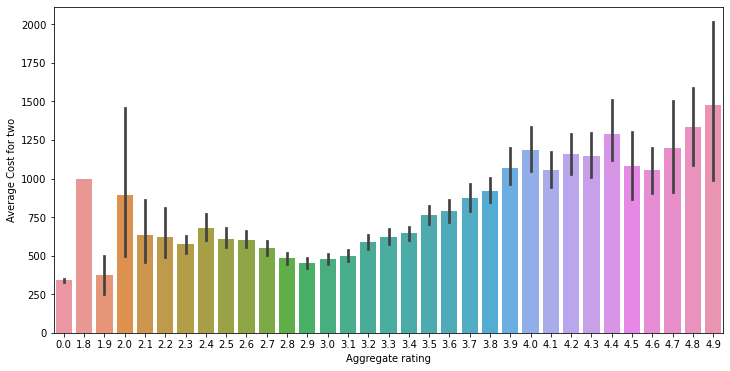

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Average Cost for two',data=zomato);

## Getting the rating of the below restaurants having below common eateries

    Coffee:    Cafe Coffee Day, Costa Coffee and Chaayos

    American   Domino's Pizza, McDonald's, Burger King, Subway and Pizza Hut

In [8]:
li=['Cafe Coffee Day','Costa Coffee','Chaayos', 'Domino\'s Pizza', 'McDonald\'s', 'Burger King', 'Subway', 'Pizza Hut']
for i in li:
    for j in zomato['Restaurant Name']:
        if i==j:
            df5=zomato.loc[zomato['Restaurant Name']==j]
    print(df5[['Locality','Restaurant Name','Aggregate rating']])
            

                              Locality  Restaurant Name  Aggregate rating
308                          Sector 15  Cafe Coffee Day               3.3
502           Shipra Mall, Indirapuram  Cafe Coffee Day               3.2
659         DLF Mega Mall, DLF Phase 1  Cafe Coffee Day               2.6
716                        DLF Phase 3  Cafe Coffee Day               3.1
717                        DLF Phase 3  Cafe Coffee Day               3.2
...                                ...              ...               ...
8228                         Sector 62  Cafe Coffee Day               3.0
8229                         Sector 62  Cafe Coffee Day               3.0
8273                         Sector 62  Cafe Coffee Day               0.0
8449  The Great India Place, Sector 38  Cafe Coffee Day               2.7
8450  The Great India Place, Sector 38  Cafe Coffee Day               2.7

[83 rows x 3 columns]
                                  Locality Restaurant Name  Aggregate rating
505         

## Heatmap for understanding the correlation for each variable


<AxesSubplot:>

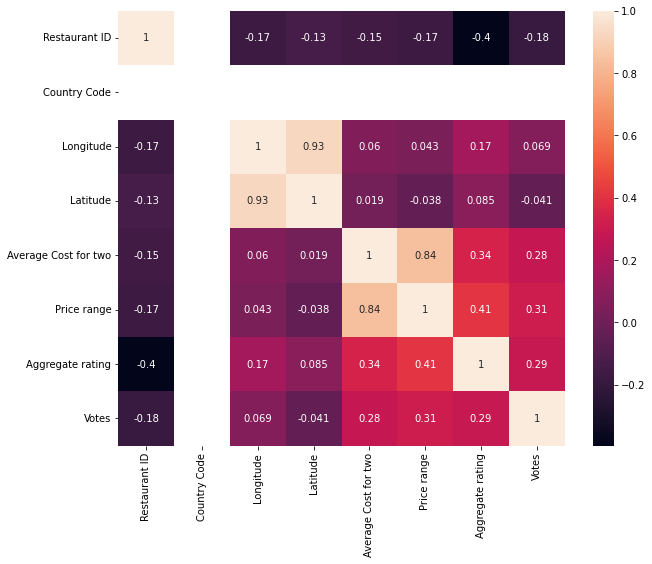

In [14]:
plt.figure(figsize=(10, 8))
corr = zomato.corr()
sns.heatmap(corr,annot=True)

##  Boxplots to explore the outliers from the relevant columns

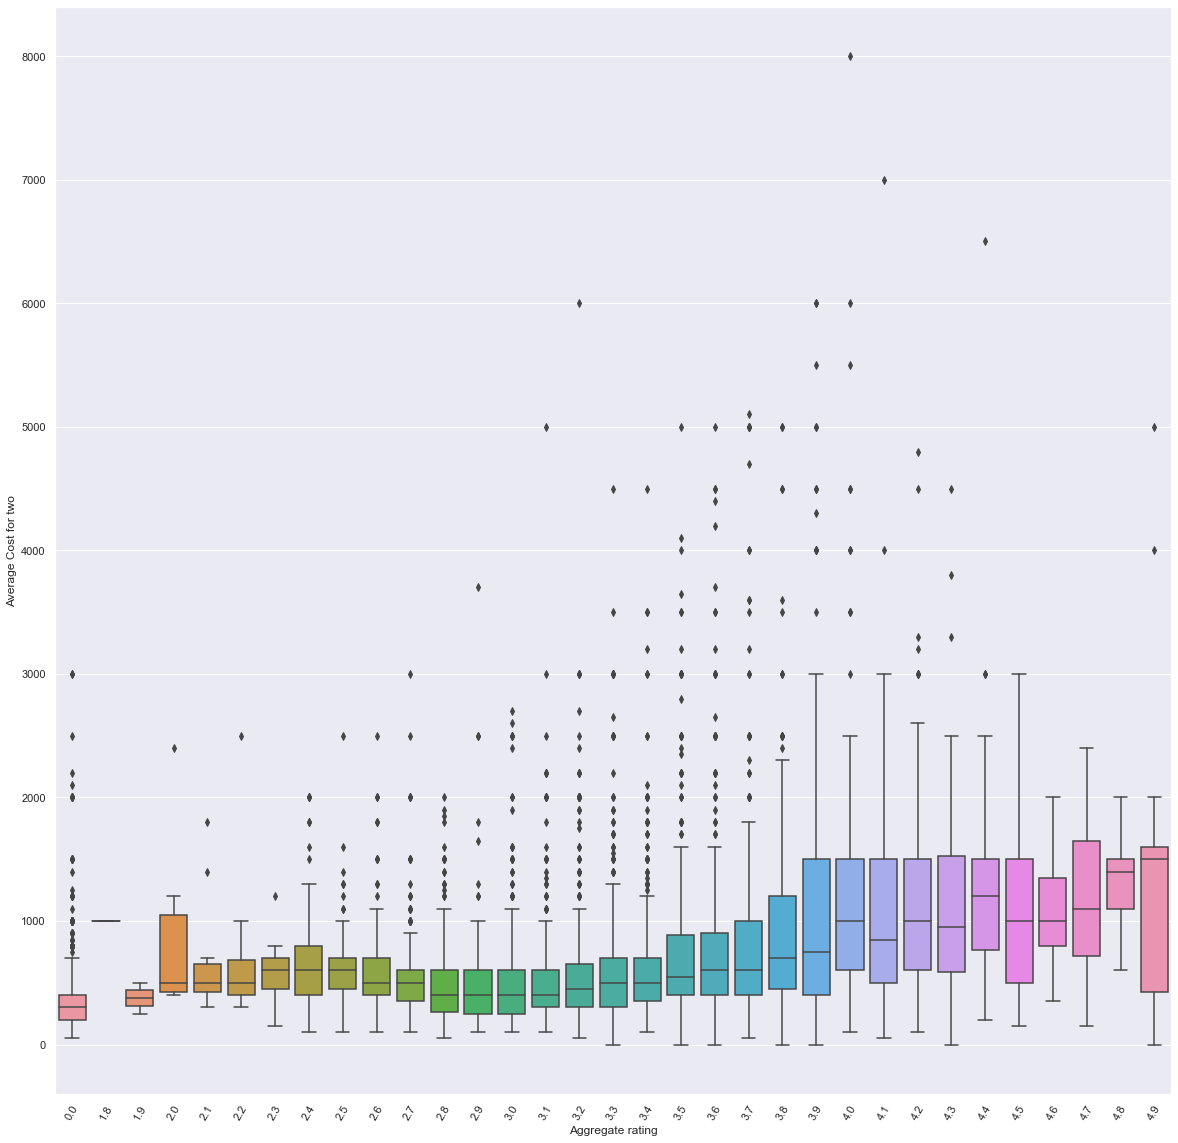

In [15]:
sns.set(rc={"figure.figsize":(20,20)})
plt.xticks(rotation = 60)
sns.boxplot( x=zomato['Aggregate rating'], y=zomato['Average Cost for two']);


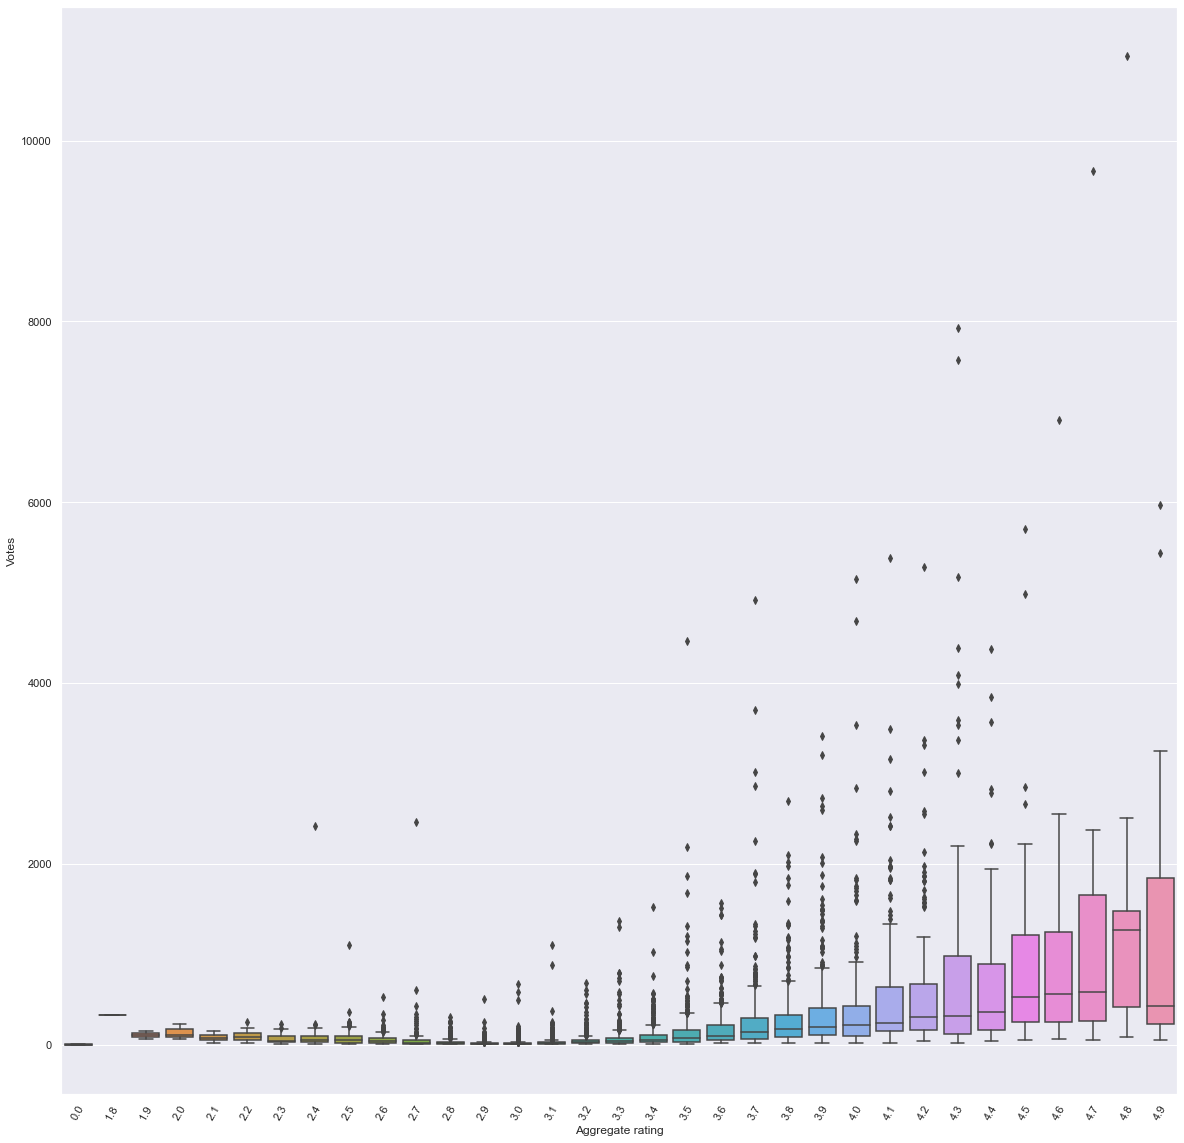

In [16]:
sns.set(rc={"figure.figsize":(20,20)})
plt.xticks(rotation = 60)
sns.boxplot( x=zomato['Aggregate rating'], y=zomato['Votes']);


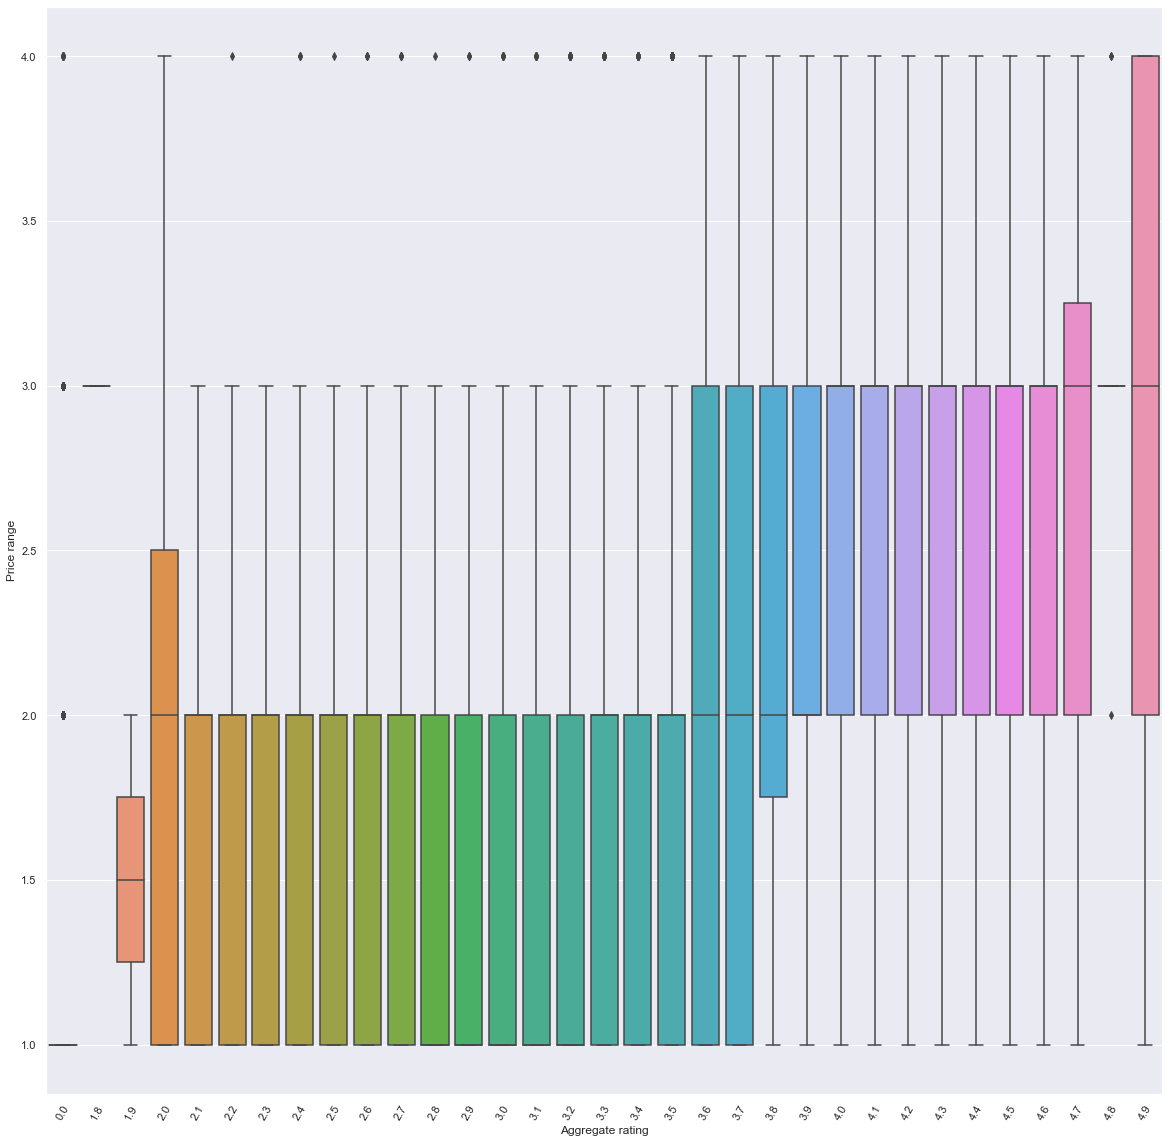

In [17]:
sns.set(rc={"figure.figsize":(20,20)})
plt.xticks(rotation = 60)
sns.boxplot( x=zomato['Aggregate rating'], y=zomato['Price range']);
